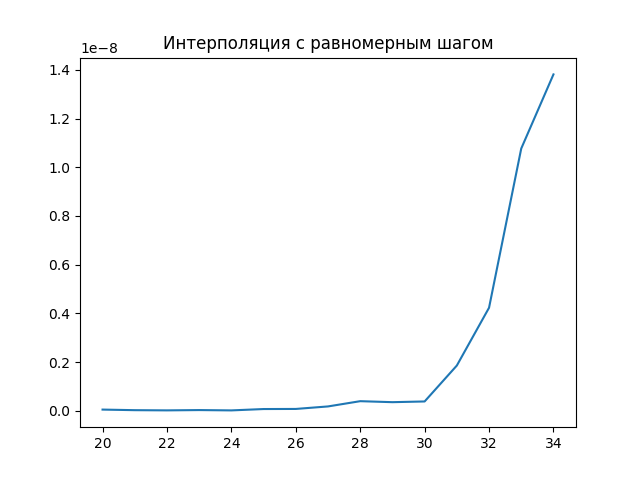

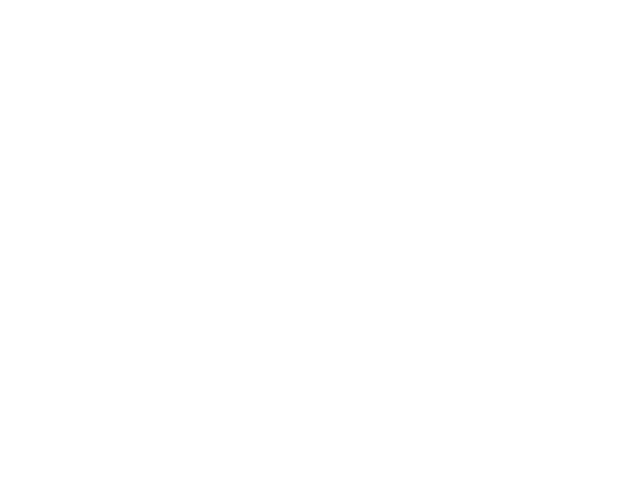

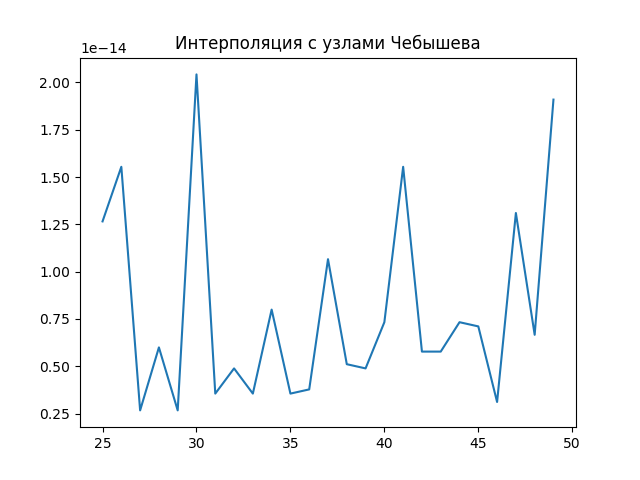

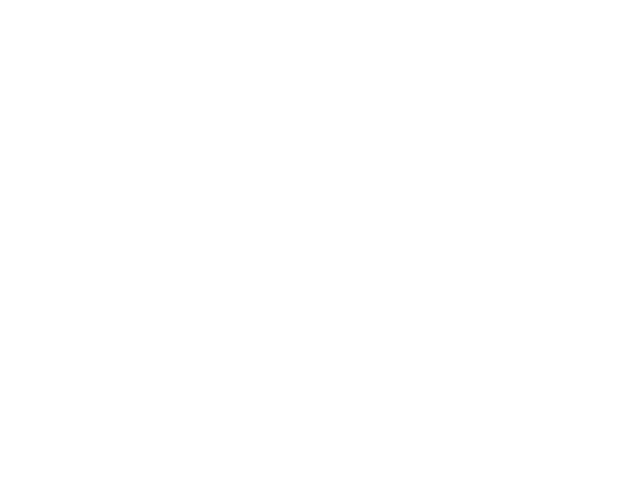

In [2]:
from matplotlib import pyplot as plt
import numpy as np


n = 50
a = 0
b = 10


def f(x):
    return np.exp(np.sin(x/5))*np.log(2+np.cos(x/6))


def lagrange(arg, x, y):
    L = 0
    for i in range(len(y)):
        F = 1
        for j in range(len(x)):
            if j != i:
                F *= (arg - x[j]) / (x[i] - x[j])
        L += y[i] * F
    return L


def interpolate(a, b, n):
    step = (b - a) / (n-1)
    x_node = np.arange(a, b+step, step)
    y_node = f(x_node)
    #x_new = [((x_node[i + 1] + x_node[i]) / 2) for i in range(len(x_node)-1)]
    x_new = np.linspace(0, 10, 100)
    y_new = [lagrange(x, x_node, y_node) for x in x_new]
    y_true = [f(x) for x in x_new]
    fig, pic = plt.subplots(2, figsize=(14, 14))
    plt.rcParams['font.size'] = '14'
    pic[0].plot(x_new, y_true, color='blue', label='Истинные значения', linewidth=5)
    pic[0].plot(x_new, y_new, color='orange', label='Полином Лагранжа', linewidth=3)
    pic[1].plot(x_new, [abs(y_new[i] - y_true[i]) for i in range(len(y_new))], color='green', label='Погрешность')
    pic[0].set(title="Интерполяция с равномерным шагом")
    pic[1].set(title="Погрешность для интерполяции с равномернымм шагом")
    pic[0].set_xlabel("x")
    pic[0].set_ylabel("y")
    pic[0].legend()
    pic[1].legend()
    plt.show()


def interpolateChebyshev(a, b, n):
    x_node = []
    for i in range(n):
        x_node.append((b + a) / 2 + (b - a) * np.cos(np.pi * (2 * (i + 1) / (2 * n))) / 2)
    y_node = [f(x) for x in x_node]
    #x_new = [(x_node[i + 1] + x_node[i]) / 2 for i in range(len(x_node) - 1)]
    x_new = np.linspace(0, 10, 100)
    y_new = [lagrange(x, x_node, y_node) for x in x_new]
    y_true = [f(x) for x in x_new]
    fig, pic = plt.subplots(2, figsize=(14, 14))
    plt.rcParams['font.size'] = '14'
    pic[0].plot(x_new, y_true, color='blue', label='Истинные значения', linewidth=5)
    pic[0].plot(x_new, y_new, color='orange', label='Полином Лагранжа', linewidth=3)
    pic[1].plot(x_new, [abs(y_new[i] - y_true[i]) for i in range(len(y_new))], color='green', label='Погрешность')
    pic[0].set(title="Интерполяция с узлами Чебышева")
    pic[1].set(title="Погрешность для интерполяции с узлами Чебышева")
    pic[0].set_xlabel("x")
    pic[0].set_ylabel("y")
    pic[0].legend()
    pic[1].legend()
    plt.show()


def step_pogr_interpolate():
    mas_n = np.arange(20, 35, 1)
    pogr = []
    for n in mas_n:
        step = (b - a) / (n - 1)
        x_node = np.arange(a, b + step, step)
        y_node = f(x_node)
        x_new = np.linspace(0, 10, 100)
        y_new = [lagrange(x, x_node, y_node) for x in x_new]
        y_true = [f(x) for x in x_new]
        eror = [abs(y_new[i] - y_true[i]) for i in range(len(y_new))]
        pogr.append(max(eror))
    plt.title("Интерполяция с равномерным шагом")
    plt.plot(mas_n, pogr)
    plt.show()

def step_pogr_interpolate_cheb():
    mas_n = np.arange(25, 50, 1)
    pogr = []
    for n in mas_n:
        x_node = []
        for i in range(n):
            x_node.append((b + a) / 2 + (b - a) * np.cos(np.pi * (2 * (i + 1) / (2 * n))) / 2)
        y_node = [f(x) for x in x_node]
        x_new = np.linspace(0, 10, 100)
        y_new = [lagrange(x, x_node, y_node) for x in x_new]
        y_true = [f(x) for x in x_new]
        eror = [abs(y_new[i] - y_true[i]) for i in range(len(y_new))]
        pogr.append(max(eror))
    plt.title("Интерполяция с узлами Чебышева")
    plt.plot(mas_n, pogr)
    plt.show()

#interpolate(a, b, n)
#interpolateChebyshev(a, b, n)
step_pogr_interpolate()
plt.show()
step_pogr_interpolate_cheb()
plt.show()
